# **Image Augmentation Techniques Demo**

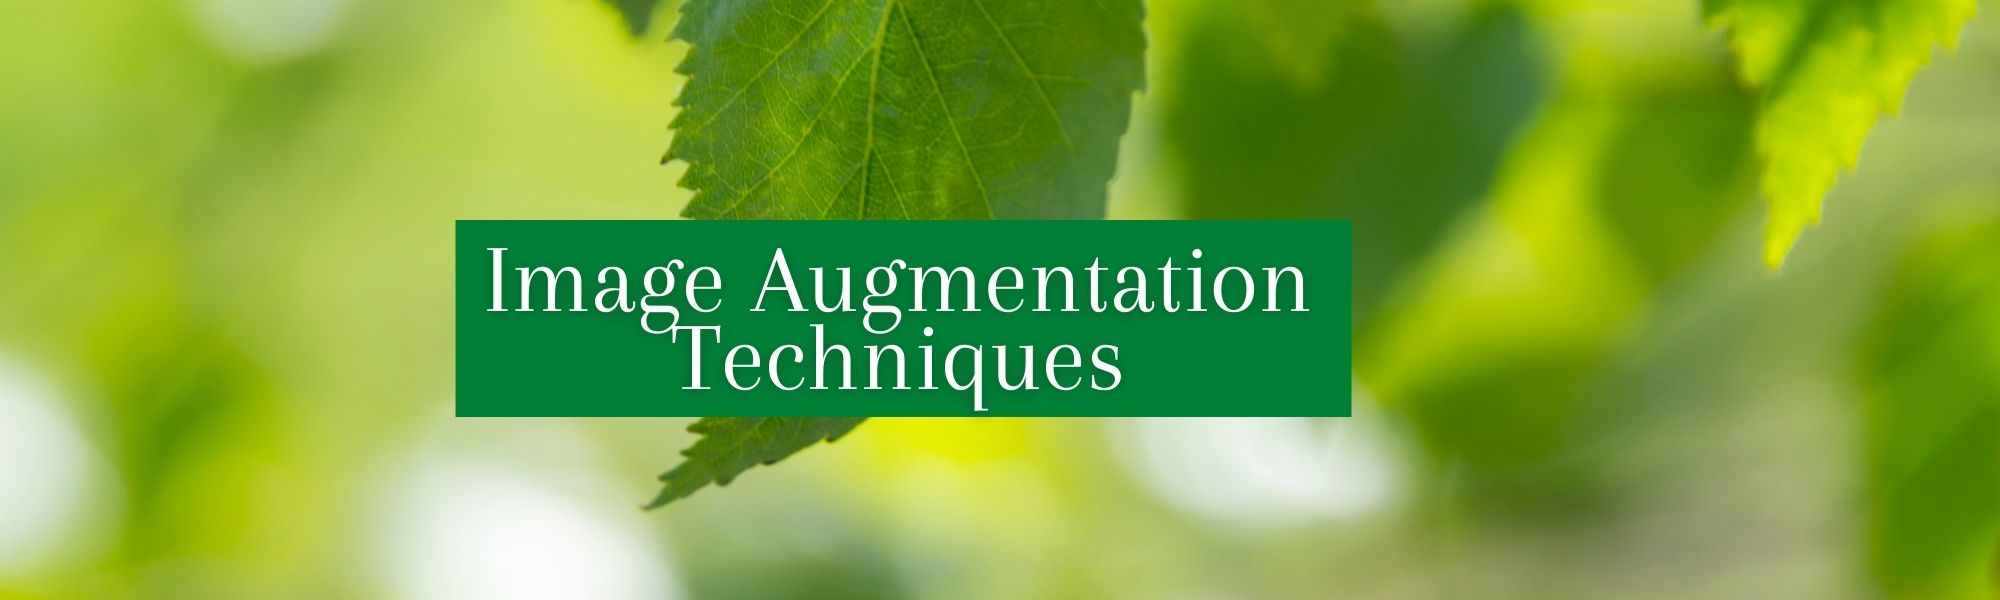

In [1]:
import os
import glob
import numpy as np
import pandas as pd
#OpenCV-Python
import cv2
#visualisation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%pylab inline
from IPython.display import HTML, Image

# **Importing a sample image**

In [2]:
image = mpimg.imread('../input/sample-leaf/sample_leaf.JPG')
imgplot = plt.imshow(image)
plt.show()

# **1. Flipping image with OpenCV**

In [3]:
#vertically flipped 
img_vflip = cv2.flip(image, 0)
cv2.imwrite('cv_img_vflip.jpg', img_vflip)

#Horizontanlly flipped image
img_hflip = cv2.flip(image, 1)
cv2.imwrite('cv_hflip.jpg', img_hflip)

In [4]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,12))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(img_hflip)
ax[1].set_title("Horizontally flipped", size=10)
ax[2].imshow(img_vflip)
ax[2].set_title("Vertically flipped", size=10)

# **2. Rotating Image with OpenCV**

In [5]:
img_rotate_90_clockwise = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
cv2.imwrite('cv_rotate_90_clockwise.jpg', img_rotate_90_clockwise)

img_rotate_90_counterclockwise = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2.imwrite('cv_rotate_90_counterclockwise.jpg', img_rotate_90_counterclockwise)

img_rotate_180 = cv2.rotate(image, cv2.ROTATE_180)
cv2.imwrite('cv_rotate_180.jpg', img_rotate_180)

In [6]:
fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(12,12))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(img_rotate_90_clockwise)
ax[1].set_title("Rotated_90_clockwise", size=10)
ax[2].imshow(img_rotate_90_counterclockwise)
ax[2].set_title("Rotated_90_counterclockwise", size=10);
ax[3].imshow(img_rotate_180)
ax[3].set_title("Rotated_180", size=10);

# **Crop or Resize Image using OpenCV**

In [7]:
# downscale the image using new  width and height
down_width = 300
down_height = 200
down_points = (down_width, down_height)

resized_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)
 
# upscale the image using new  width and height
up_width = 300
up_height = 500
up_points = (up_width, up_height)
resized_up = cv2.resize(image, up_points, interpolation= cv2.INTER_LINEAR)

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(9,9))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(resized_down)
ax[1].set_title("Smaller image", size=10)
ax[2].imshow(resized_up)
ax[2].set_title("Larger image", size=10);

# **Image Translation using OpenCV**

In [9]:
# Store height and width of the image
height, width = image.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
img_translation = cv2.warpAffine(image, T, (width, height))

In [10]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(img_translation)
ax[1].set_title("Translation", size=10)

# **Image Brightness using OpenCV**

In [11]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [12]:
brightened_img = increase_brightness(image, value=100)

In [13]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(brightened_img)
ax[1].set_title("Brightened Image", size=10)

# **Image Contrast using OpenCV**

In [14]:
alpha = 2 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

contrast_img = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

In [15]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(contrast_img)
ax[1].set_title("Contrast Image", size=10)

# **Image Color change using OpenCV**

In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
BGR2RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
BGR2HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
RGB2BGR=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)

In [17]:
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(14,14))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(gray,cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Grayscale", size=10)
ax[2].imshow(BGR2RGB)
ax[2].set_title("BGR2RGB", size=10)
ax[3].imshow(BGR2HSV)
ax[3].set_title("BGR2HSV", size=10)
ax[4].imshow(RGB2BGR)
ax[4].set_title("BGR2RGB", size=10)

# **Adding Noise to Image**

In [18]:
from skimage.util import random_noise
# Add salt-and-pepper noise to the image.
noise_img = random_noise(image, mode='s&p',amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(noise_img)
ax[1].set_title("Noise_Image", size=10)

# **Zoom Image with OpenCV**

In [20]:
print(image.shape)

In [21]:
crop = image[100:150,50:100]

zoom_in = cv2.resize(crop, None, fx= 3, fy= 1.5, interpolation= cv2.INTER_LINEAR)

In [22]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(6,4))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(zoom_in)
ax[1].set_title("Zoomed_In", size=10)

# **Color Saturation image using OpenCV**

In [23]:
img= cv2.imread ('../input/sample-leaf/sample_leaf.JPG')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
greenMask = cv2.inRange(hsv, (26, 10, 30), (97, 100, 255))

img[greenMask == 255] = (0, 255, 0)

In [24]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(img)
ax[1].set_title("Saturated_Image", size=10)

# **Cropping Image with OpenCV**

In [25]:
cropped = image[0:120, 100:200] 

In [26]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(6,4))
ax[0].imshow(image)
ax[0].set_title("Original Image", size=10)
ax[1].imshow(cropped)
ax[1].set_title("cropped", size=10)